In [ ]:
from google.colab import drive
import sys

drive.mount('/content/gdrive')
gdrive_path = "/content/gdrive/MyDrive/AIM/"
sys.path.append(gdrive_path)
!ls -l /content/gdrive/MyDrive/AIM/citizen*.*
import aim_util

Mounted at /content/gdrive
-rw------- 1 root root    2696 Apr 15 14:07 /content/gdrive/MyDrive/AIM/citizen_1864_20240414_213308040_groundtruth.txt
-rw------- 1 root root 3663644 Apr 14 21:34 /content/gdrive/MyDrive/AIM/citizen_1864_20240414_213308040.jpg
-rw------- 1 root root    2696 May  2 20:40 /content/gdrive/MyDrive/AIM/citizen_1864_groundtruth_annotated.txt
-rw------- 1 root root    3899 May  3 15:25 /content/gdrive/MyDrive/AIM/citizen_1864_groundtruth_word_list_lower.txt
-rw------- 1 root root    3899 May  3 15:25 /content/gdrive/MyDrive/AIM/citizen_1864_groundtruth_word_list.txt
-rw------- 1 root root    3899 May  3 15:25 /content/gdrive/MyDrive/AIM/citizen_1864_groundtruth_word_string_lower.txt
-rw------- 1 root root    3899 May  3 15:25 /content/gdrive/MyDrive/AIM/citizen_1864_groundtruth_word_string.txt
-rw------- 1 root root 3663644 Apr 23 20:54 /content/gdrive/MyDrive/AIM/citizen_1864_rescan.jpg
-rw------- 1 root root   68979 May 16 12:58 /content/gdrive/MyDrive/AIM/citize

FileNotFoundError: Cannot find file: example.txt

In [ ]:
import aim_util

In [ ]:
import os
from google.colab import drive
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
def show_image(image_path):
    img = mpimg.imread(image_path)
    plt.imshow(img)
    return img

array([[[81, 63, 53],
        [83, 65, 55],
        [82, 64, 52],
        ...,
        [41, 40, 36],
        [42, 41, 37],
        [43, 42, 38]],

       [[85, 67, 57],
        [85, 67, 57],
        [83, 65, 53],
        ...,
        [39, 38, 34],
        [40, 39, 35],
        [41, 40, 36]],

       [[87, 69, 59],
        [86, 68, 58],
        [85, 67, 57],
        ...,
        [42, 41, 37],
        [42, 41, 37],
        [43, 42, 38]],

       ...,

       [[17,  7,  5],
        [18,  8,  6],
        [16,  6,  4],
        ...,
        [33, 41, 43],
        [36, 44, 46],
        [30, 38, 40]],

       [[16,  6,  4],
        [17,  7,  5],
        [17,  7,  5],
        ...,
        [31, 41, 42],
        [35, 45, 46],
        [29, 39, 40]],

       [[18,  8,  6],
        [17,  7,  5],
        [19,  9,  7],
        ...,
        [31, 41, 42],
        [36, 46, 47],
        [34, 44, 45]]], dtype=uint8)

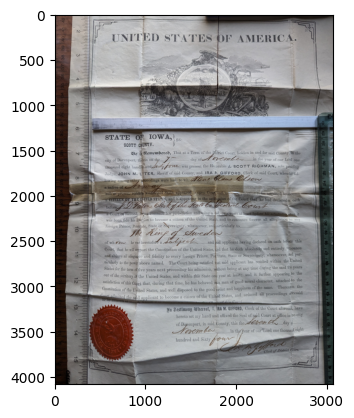

In [ ]:
image_path = '/content/gdrive/MyDrive/AIM/citizen_1864_rescan.jpg'
aim_util.show_image(image_path)

array([[[81, 63, 53],
        [83, 65, 55],
        [82, 64, 52],
        ...,
        [41, 40, 36],
        [42, 41, 37],
        [43, 42, 38]],

       [[85, 67, 57],
        [85, 67, 57],
        [83, 65, 53],
        ...,
        [39, 38, 34],
        [40, 39, 35],
        [41, 40, 36]],

       [[87, 69, 59],
        [86, 68, 58],
        [85, 67, 57],
        ...,
        [42, 41, 37],
        [42, 41, 37],
        [43, 42, 38]],

       ...,

       [[17,  7,  5],
        [18,  8,  6],
        [16,  6,  4],
        ...,
        [33, 41, 43],
        [36, 44, 46],
        [30, 38, 40]],

       [[16,  6,  4],
        [17,  7,  5],
        [17,  7,  5],
        ...,
        [31, 41, 42],
        [35, 45, 46],
        [29, 39, 40]],

       [[18,  8,  6],
        [17,  7,  5],
        [19,  9,  7],
        ...,
        [31, 41, 42],
        [36, 46, 47],
        [34, 44, 45]]], dtype=uint8)

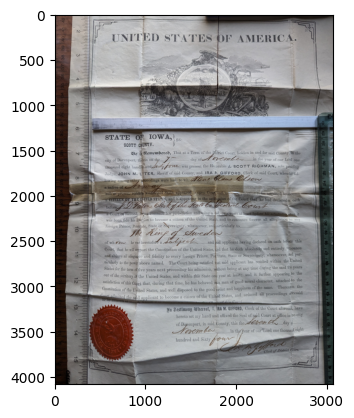

In [ ]:
show_image(image_path)

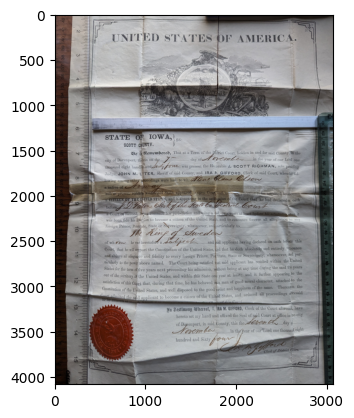

In [ ]:
img = mpimg.imread(image_path)
plt.imshow(img)

In [ ]:
!pip install keras_ocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 5.6 MB/s eta 0:00:00


In [ ]:
import keras_ocr
import math

pipeline_OCR = keras_ocr.pipeline.Pipeline()

def Detect(image_path,pipeline):
    """OCR for text detection"""


    # Read in image path
    read_image = keras_ocr.tools.read(image_path)
    # prediction_groups is a list of (word, box) tuples
    prediction_groups = pipeline.recognize([read_image])
    return prediction_groups[0]

def Distance(predictions):
    """
    Returns dictionary with (key,value):

    """

    # Point of origin
    x0, y0 = 0, 0
    # Generate dictionary
    detections = []
    for group in predictions:

        # Get center point of bounding box
      top_left_x, top_left_y = group[1][0]
      bottom_right_x, bottom_right_y = group[1][1]
      center_x = (top_left_x + bottom_right_x) / 2
      center_y = (top_left_y + bottom_right_y) / 2
      # Use the Pythagorean Theorem to solve for distance from origin
      distance_from_origin = math.dist([x0,y0], [center_x, center_y])
      # Calculate difference between y and origin to get unique rows
      distance_y = center_y - y0
      # Append all results
      detections.append({
                          'text':group[0],
                          'center_x':center_x,
                          'center_y':center_y,
                          'distance_from_origin':distance_from_origin,
                          'distance_y':distance_y
                      })
    return detections

def distinguish_rows(lst, thresh):
    """Function to help distinguish unique rows"""

    sublists = []
    for i in range(0, len(lst)-1):
        if lst[i+1]['distance_y'] - lst[i]['distance_y'] <= thresh:
            if lst[i] not in sublists:
                sublists.append(lst[i])
            sublists.append(lst[i+1])
        else:
            yield sublists
            sublists = [lst[i+1]]
    yield sublists


def OCR(image_path, pipeline=pipeline_OCR, order='yes',thresh=6):
    """
    Function returns predictions in human readable order
    from left to right & top to bottom
    """
    ordered_preds = []
    predictions = Detect(image_path, pipeline)
    #print(f"predictions (raw)->{predictions}")
    predictions_2 = Distance(predictions)
    #print(f"predictions_2->{predictions_2}")
    longitud=len(predictions_2)
    if longitud==1: ordered_preds= predictions_2[0]['text']
    else:

      predictions_3 = list(distinguish_rows(predictions_2, thresh))
      #print(f"predictions_3->{predictions_3}")
      # Remove all empty rows
      predictions_3_f = list(filter(lambda x:x!=[], predictions_3))
      #print(f"predictions_3_f->{predictions_3_f}")
      # Order text detections in human readable format

      ylst = ['yes', 'y']
      for pr in predictions_3_f:
          if order in ylst:
              row = sorted(pr, key=lambda x:x['distance_from_origin'])
              for each in row:
                  ordered_preds.append(each['text'])
    #print(f"ordered_preds->{ordered_preds}")

    with open('texto.txt','a+') as f:
      for word in ordered_preds:
        f.write(word+' ')
    text=''
    for word in ordered_preds:

      text=text+' '+word

    #print(f"text->{text}")
    return predictions, ordered_preds, text

Looking for /root/.keras-ocr/craft_mlt_25k.h5


Instructions for updating:
Use `tf.image.resize(...method=ResizeMethod.BILINEAR...)` instead.


Looking for /root/.keras-ocr/crnn_kurapan.h5


In [ ]:
import pickle
import numpy as np
import pandas as pd

def preds_to_pd(predictions):
    data_list = []

    for word, coords in predictions:
        upper_left_X, upper_left_Y, lower_left_X, lower_left_Y, lower_right_X, lower_right_Y, upper_right_X, upper_right_Y = coords.flatten()
        data_list.append([word, upper_left_X, upper_left_Y, lower_left_X, lower_left_Y, lower_right_X, lower_right_Y, upper_right_X, upper_right_Y])

    df = pd.DataFrame(data_list, columns=['word', 'upper_left_X', 'upper_left_Y', 'lower_left_X', 'lower_left_Y', 'lower_right_X', 'lower_right_Y', 'upper_right_X', 'upper_right_Y'])
    df = df.astype({col: np.float32 for col in df.columns[1:]})

    return df

def write_to_pickle(df, path):
    """Write the DataFrame to a Pickle file (*.pkl) at the specified path"""
    with open(path, 'wb') as f:
        pickle.dump(df, f)
        print(f"Dataframe successfully written to: {path}")

def read_from_pickle(path):
    """Read the Pickle file into a Pandas dataframe"""
    with open(path, 'rb') as f:
        return pickle.load(f)

def write_preds_fileset(predictions, ordered_preds, word_preds, base_name):
    aim_util.write_text(str(ordered_preds), gdrive_path + base_name + "_word_list.txt")
    aim_util.write_text(word_preds, gdrive_path + base_name + "_word_string.txt")

    preds_df = preds_to_pd(predictions)

    pickle_path = gdrive_path + base_name + "_bbox.pkl"
    write_to_pickle(preds_df, pickle_path)


15/15 [==============================] - 134s 9s/step
CPU times: user 4min 42s, sys: 23.6 s, total: 5min 6s
Wall time: 3min 51s


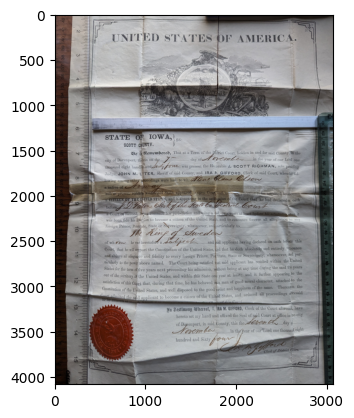

In [ ]:
%%time
base_name = 'citizen_1864_xform0_carlv'
image_path = '/content/gdrive/MyDrive/AIM/citizen_1864_rescan.jpg'
img = mpimg.imread(image_path)
plt.imshow(img)

predictions, ordered_preds, word_preds = OCR(image_path, pipeline_OCR, order='yes', thresh=16)

write_preds_fileset(predictions, ordered_preds, word_preds, base_name)

In [ ]:
def test_preds_to_pickle(predictions)
    preds_df = preds_to_pd(predictions)

    pickle_path = gdrive_path + base_name + "_bbox.pkl"

    preds_read_df = read_from_pickle(pickle_path)

    # Compare the two dataframes
    result = preds_df.equals(preds_read_df)
    print("Result of comparison:", result)

Result of comparison: True


15/15 [==============================] - 131s 9s/step
Text string of 3796 bytes successfully written to /content/gdrive/MyDrive/AIM/citizen_1864_xform1_carlv_word_list.txt.
Text string of 2431 bytes successfully written to /content/gdrive/MyDrive/AIM/citizen_1864_xform1_carlv_word_string.txt.
Dataframe successfully written to: /content/gdrive/MyDrive/AIM/citizen_1864_xform1_carlv_bbox.pkl
CPU times: user 4min 40s, sys: 25.4 s, total: 5min 5s
Wall time: 3min 29s


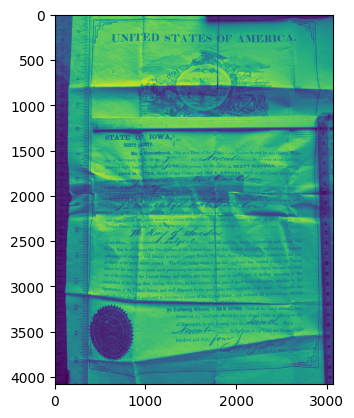

In [ ]:
%%time
base_name = 'citizen_1864_xform1_carlv'
image_path = '/content/gdrive/MyDrive/AIM/citizen_xform1.jpg'
aim_util.show_image(image_path)

predictions, ordered_preds, word_preds = OCR(image_path, pipeline_OCR, order='yes', thresh=16)

write_preds_fileset(predictions, ordered_preds, word_preds, base_name)

12/12 [==============================] - 103s 9s/step
Text string of 3044 bytes successfully written to /content/gdrive/MyDrive/AIM/citizen_1864_xform2_carlv_word_list.txt.
Text string of 1985 bytes successfully written to /content/gdrive/MyDrive/AIM/citizen_1864_xform2_carlv_word_string.txt.
Dataframe successfully written to: /content/gdrive/MyDrive/AIM/citizen_1864_xform2_carlv_bbox.pkl
CPU times: user 3min 55s, sys: 19.2 s, total: 4min 14s
Wall time: 3min 50s


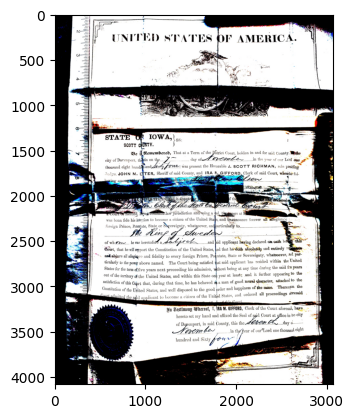

In [ ]:
%%time
base_name = 'citizen_1864_xform2_carlv'
image_path = '/content/gdrive/MyDrive/AIM/citizen_xform2.jpg'
aim_util.show_image(image_path)

predictions, ordered_preds, word_preds = OCR(image_path, pipeline_OCR, order='yes', thresh=16)

write_preds_fileset(predictions, ordered_preds, word_preds, base_name)

15/15 [==============================] - 132s 9s/step
Text string of 3770 bytes successfully written to /content/gdrive/MyDrive/AIM/citizen_1864_xform3_carlv_word_list.txt.
Text string of 2396 bytes successfully written to /content/gdrive/MyDrive/AIM/citizen_1864_xform3_carlv_word_string.txt.
Dataframe successfully written to: /content/gdrive/MyDrive/AIM/citizen_1864_xform3_carlv_bbox.pkl
CPU times: user 4min 39s, sys: 20.8 s, total: 5min
Wall time: 3min 40s


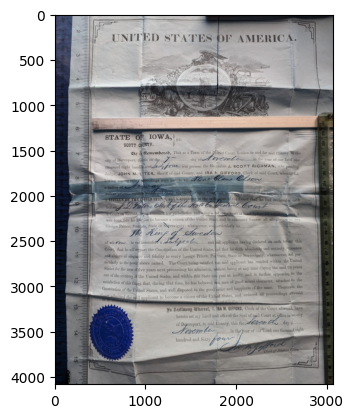

In [ ]:
%%time
base_name = 'citizen_1864_xform3_carlv'
image_path = '/content/gdrive/MyDrive/AIM/citizen_xform3.jpg'
aim_util.show_image(image_path)

predictions, ordered_preds, word_preds = OCR(image_path, pipeline_OCR, order='yes', thresh=16)

write_preds_fileset(predictions, ordered_preds, word_preds, base_name)

10/10 [==============================] - 82s 8s/step
Text string of 2450 bytes successfully written to /content/gdrive/MyDrive/AIM/citizen_1864_xform4_carlv_word_list.txt.
Text string of 1583 bytes successfully written to /content/gdrive/MyDrive/AIM/citizen_1864_xform4_carlv_word_string.txt.
Dataframe successfully written to: /content/gdrive/MyDrive/AIM/citizen_1864_xform4_carlv_bbox.pkl
CPU times: user 3min 24s, sys: 16.7 s, total: 3min 41s
Wall time: 3min 22s


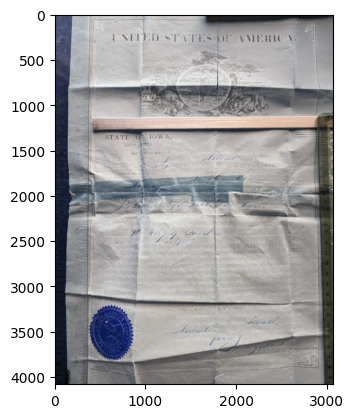

In [ ]:
%%time
base_name = 'citizen_1864_xform4_carlv'
image_path = '/content/gdrive/MyDrive/AIM/citizen_xform4.jpg'
aim_util.show_image(image_path)

predictions, ordered_preds, word_preds = OCR(image_path, pipeline_OCR, order='yes', thresh=16)

write_preds_fileset(predictions, ordered_preds, word_preds, base_name)

15/15 [==============================] - 131s 9s/step
Text string of 3809 bytes successfully written to /content/gdrive/MyDrive/AIM/citizen_1864_xform5_carlv_word_list.txt.
Text string of 2432 bytes successfully written to /content/gdrive/MyDrive/AIM/citizen_1864_xform5_carlv_word_string.txt.
Dataframe successfully written to: /content/gdrive/MyDrive/AIM/citizen_1864_xform5_carlv_bbox.pkl
CPU times: user 4min 38s, sys: 19.8 s, total: 4min 57s
Wall time: 3min 20s


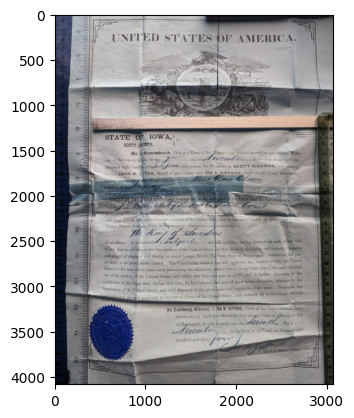

In [ ]:
%%time
base_name = 'citizen_1864_xform5_carlv'
image_path = '/content/gdrive/MyDrive/AIM/citizen_xform5.jpg'
aim_util.show_image(image_path)

predictions, ordered_preds, word_preds = OCR(image_path, pipeline_OCR, order='yes', thresh=16)

write_preds_fileset(predictions, ordered_preds, word_preds, base_name)